In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image


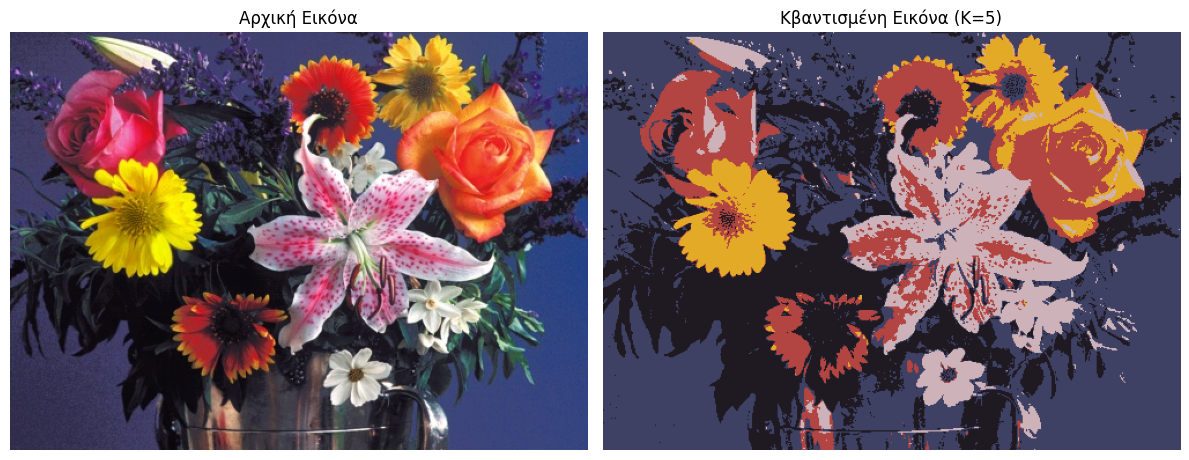

Μέσο τετραγωνικό Σφάλμα Κβαντισμού: 595.70


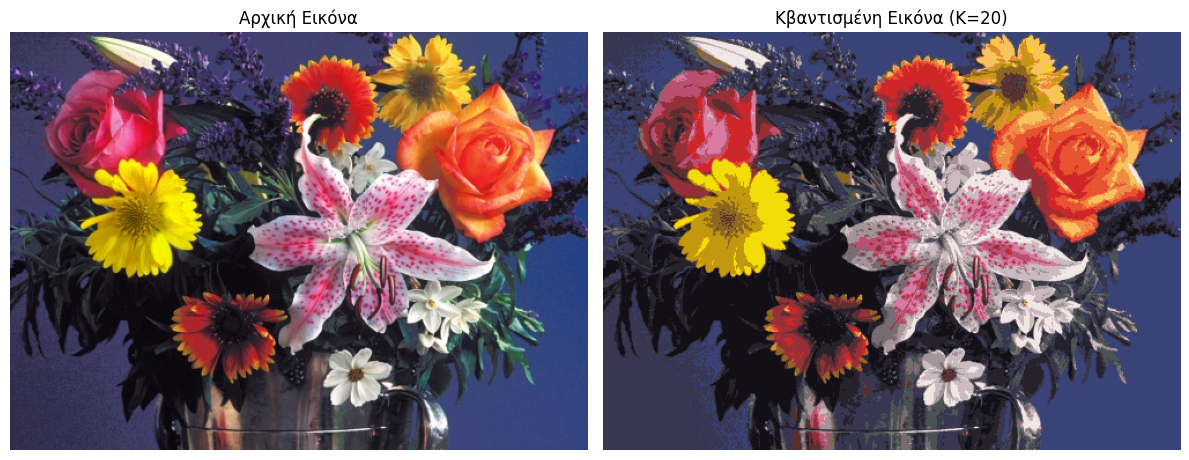

Μέσο τετραγωνικό Σφάλμα Κβαντισμού: 158.03


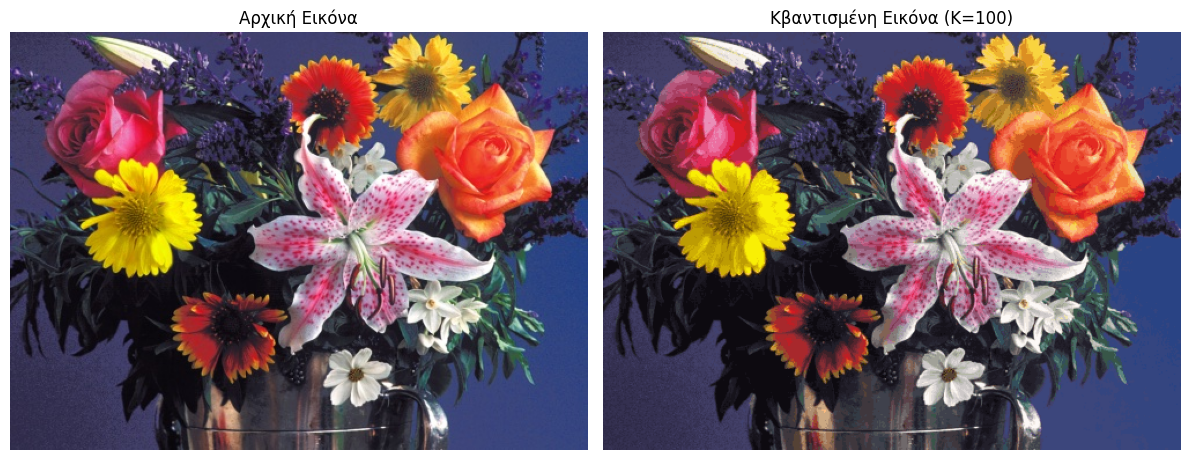

Μέσο τετραγωνικό Σφάλμα Κβαντισμού: 41.89


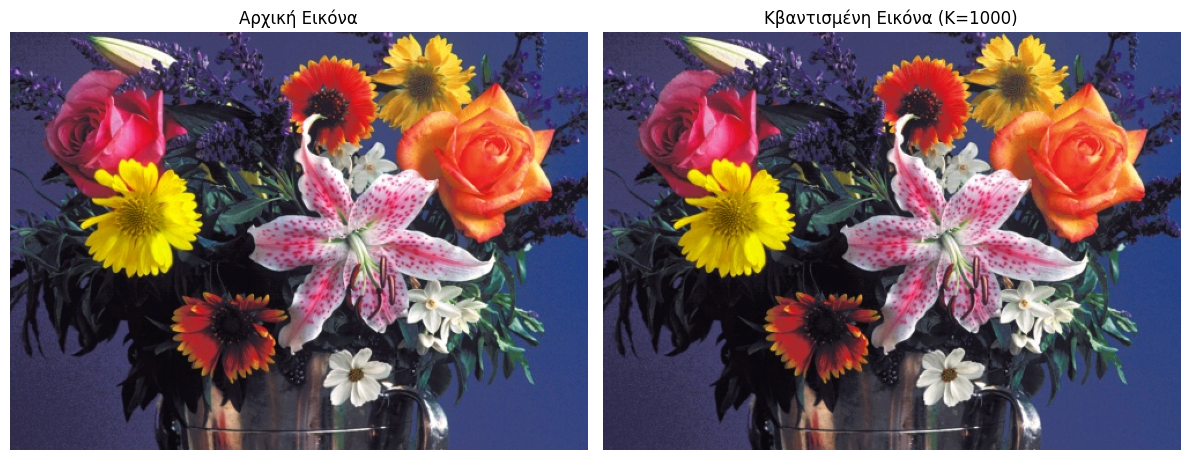

Μέσο τετραγωνικό Σφάλμα Κβαντισμού: 8.90


In [5]:
def quantize_image_kmeans(image_path, n_colors):
    # 1. Load Image
    img = Image.open(image_path)
    img = img.convert('RGB')
    img_np = np.array(img)
    w, h, d = img_np.shape

    # 2. Μετατροπή σε πίνακα Nx3 (pixels × RGB)
    pixels = img_np.reshape(-1, 3)

    # 3. Εφαρμογή K-means
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(pixels)
    labels = kmeans.labels_
    new_colors = kmeans.cluster_centers_.astype('uint8')

    # 4. Δημιουργία νέας εικόνας
    quantized_image = new_colors[labels].reshape(w, h, 3)

    # 5. Εμφάνιση αρχικής και κβαντισμένης εικόνας
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img_np)
    axes[0].set_title("Αρχική Εικόνα")
    axes[0].axis('off')

    axes[1].imshow(quantized_image)
    axes[1].set_title(f"Κβαντισμένη Εικόνα (K={n_colors})")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

    return quantized_image

from sklearn.metrics import mean_squared_error

def compute_mse(original, quantized):
    # Μετατροπή σε μονοδιάστατο πίνακα για να υπολογίσουμε MSE σε όλα τα κανάλια RGB
    orig_flat = original.reshape(-1, 3).astype('uint8')
    quant_flat = quantized.reshape(-1, 3).astype('uint8')
    mse = mean_squared_error(orig_flat, quant_flat)
    return mse


quantized = quantize_image_kmeans("flowers.jpg", n_colors=5)
original_image = np.array(Image.open("flowers.jpg").convert('RGB'))
mse = compute_mse(original_image, quantized)
print(f"Μέσο τετραγωνικό Σφάλμα Κβαντισμού: {mse:.2f}")
quantized = quantize_image_kmeans("flowers.jpg", n_colors=20)
mse = compute_mse(original_image, quantized)
print(f"Μέσο τετραγωνικό Σφάλμα Κβαντισμού: {mse:.2f}")
quantized = quantize_image_kmeans("flowers.jpg", n_colors=100)
mse = compute_mse(original_image, quantized)
print(f"Μέσο τετραγωνικό Σφάλμα Κβαντισμού: {mse:.2f}")
quantized = quantize_image_kmeans("flowers.jpg", n_colors=1000)
mse = compute_mse(original_image, quantized)
print(f"Μέσο τετραγωνικό Σφάλμα Κβαντισμού: {mse:.2f}")
